In [73]:
import pandas as pd
df00f = pd.read_csv("D:/final.csv", encoding='utf-8')
import numpy as np

In [75]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 예시: 맑은 고딕 설정
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [77]:
df00f[mental_col].unique()

array([0, 1], dtype=int64)

C:\Users\82104\AppData\Local\Temp\ipykernel_8620\3624853293.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df00f.groupby(['비율구간', mental_col]).size().reset_index(name='빈도')
C:\Users\82104\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\82104\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future 

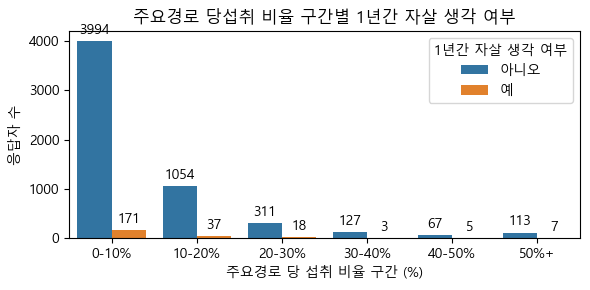

In [79]:
# 주요경로 당섭취 비율 구간별 1년간 자살 생각 여부 그래프
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 주요경로 비율 구간 나누기
df00f['비율구간'] = pd.cut(df00f['주요경로_비율(%)'],
                        bins=[0, 10, 20, 30, 40, 50, 100],
                        labels=['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50%+'],
                        include_lowest=True)
# 정신건강 지표 열 이름 (예: '우울감경험_1=예_2=아니오'와 같은 열로 바꿔줘야 함)
mental_col = 'BP6_10'  # ← 너가 쓰는 정확한 컬럼명으로 수정 필요
# 범주형 응답을 문자열로 바꾸면 더 명확함
df00f[mental_col] = df00f[mental_col].map({1: '예', 0: '아니오'})
# 구간별 응답 분포 집계
grouped = df00f.groupby(['비율구간', mental_col]).size().reset_index(name='빈도')
# 시각화
plt.figure(figsize=(6,3))
barplot = sns.barplot(data=grouped, x='비율구간', y='빈도', hue=mental_col)
plt.title('주요경로 당섭취 비율 구간별 1년간 자살 생각 여부')
plt.xlabel('주요경로 당 섭취 비율 구간 (%)')
plt.ylabel('응답자 수')
plt.legend(title='1년간 자살 생각 여부')
plt.tight_layout()
for container in barplot.containers:
    barplot.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)
plt.show()


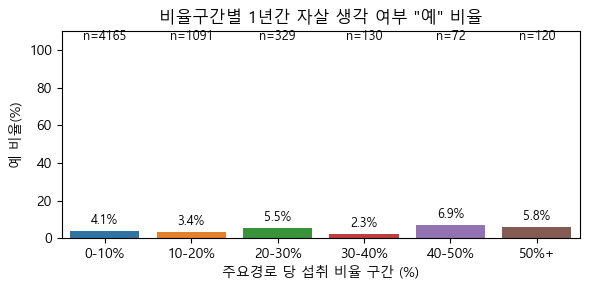

In [59]:
# 비율구간별 1년간 자살 생각 여부 "예" 비율 그래프
labels = ['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50%+']
# 구간 순서 고정
df1 = df00f.copy()
df1['비율구간'] = pd.Categorical(df1['비율구간'], categories=labels, ordered=True)
# mental_col 매핑(이미 문자열이면 원값 유지)
mental_col = 'BP6_10'
df1[mental_col] = df1[mental_col].map({1:'예', 0:'아니오'}).fillna(df1[mental_col])
# 교차표 만들고, 구간 순서대로 재정렬
ct = pd.crosstab(df1['비율구간'], df1[mental_col]).reindex(labels, fill_value=0)
# 분모(예+아니오)와 '예' 비율(%) 계산
den = ct.sum(axis=1).replace(0, np.nan)           # 분모 0이면 NaN으로 둠
yes = ct['예'] if '예' in ct.columns else 0
pct_yes = (yes / den * 100).fillna(0)

# 시각화: 구간별 '예' 비율(%) 막대
plt.figure(figsize=(6,3))
ax = sns.barplot(x=pct_yes.index, y=pct_yes.values)
ax.set_ylim(0, 110)  # 위에 n 라벨 위한 여유
ax.set_xlabel('주요경로 당 섭취 비율 구간 (%)')
ax.set_ylabel('예 비율(%)')
ax.set_title('비율구간별 1년간 자살 생각 여부 "예" 비율')
# 퍼센트 라벨
for i, v in enumerate(pct_yes.values):
    ax.text(i, min(v+2, 100), f'{v:.1f}%', ha='center', va='bottom', fontsize=9)
# 각 막대 위에 표본수(n) 표시
for i, n in enumerate(den.fillna(0).astype(int).values):
    ax.text(i, 104, f'n={n}', ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()

C:\Users\82104\AppData\Local\Temp\ipykernel_8620\3712483896.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df00f.groupby('비율구간')[stress_col].mean().reset_index()
C:\Users\82104\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


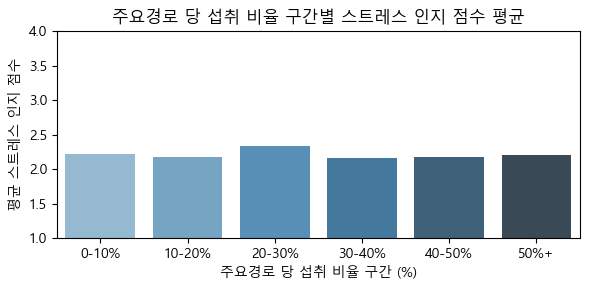

In [81]:
# 주요경로 당 섭취 비율 구간별 스트레스 인지 점수 평균 그래프
# 비율 구간 설정
df00f['비율구간'] = pd.cut(df00f['주요경로_비율(%)'],
                        bins=[0, 10, 20, 30, 40, 50, 100],
                        labels=['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50%+'],
                        include_lowest=True)

# 스트레스 인지 점수 컬럼명
stress_col = 'BP1'  # 실제 컬럼명을 여기에 입력

# 그룹별 평균 계산
grouped = df00f.groupby('비율구간')[stress_col].mean().reset_index()

# 시각화
plt.figure(figsize=(6,3))
sns.barplot(data=grouped, x='비율구간', y=stress_col, palette='Blues_d')
plt.title('주요경로 당 섭취 비율 구간별 스트레스 인지 점수 평균')
plt.xlabel('주요경로 당 섭취 비율 구간 (%)')
plt.ylabel('평균 스트레스 인지 점수')
plt.ylim(1, 4)
plt.tight_layout()
plt.show()

C:\Users\82104\AppData\Local\Temp\ipykernel_8620\665060860.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df00f.groupby(['비율구간', mental_col]).size().reset_index(name='빈도')
C:\Users\82104\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\82104\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future d

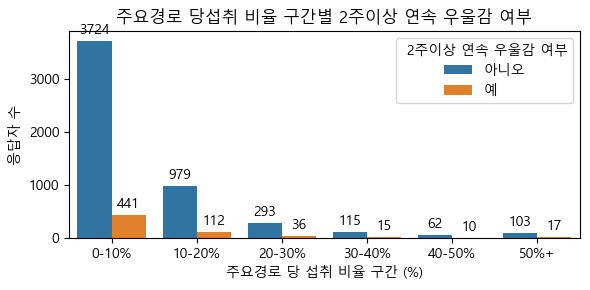

In [83]:
# 주요경로 당섭취 비율 구간별 2주이상 연속 우울감 여부 그래프
# 주요경로 비율 구간 나누기
df00f['비율구간'] = pd.cut(df00f['주요경로_비율(%)'],
                        bins=[0, 10, 20, 30, 40, 50, 100],
                        labels=['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50%+'],
                        include_lowest=True)
# 정신건강 지표 열 이름 (예: '우울감경험_1=예_2=아니오'와 같은 열로 바꿔줘야 함)
mental_col = 'BP5'  # ← 너가 쓰는 정확한 컬럼명으로 수정 필요
# 범주형 응답을 문자열로 바꾸면 더 명확함
df00f[mental_col] = df00f[mental_col].map({1: '예', 0: '아니오'})
# 구간별 응답 분포 집계
grouped = df00f.groupby(['비율구간', mental_col]).size().reset_index(name='빈도')
# 시각화
plt.figure(figsize=(6,3))
barplot = sns.barplot(data=grouped, x='비율구간', y='빈도', hue=mental_col)
plt.title('주요경로 당섭취 비율 구간별 2주이상 연속 우울감 여부')
plt.xlabel('주요경로 당 섭취 비율 구간 (%)')
plt.ylabel('응답자 수')
plt.legend(title=' 2주이상 연속 우울감 여부')
plt.tight_layout()
for container in barplot.containers:
    barplot.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)
plt.show()

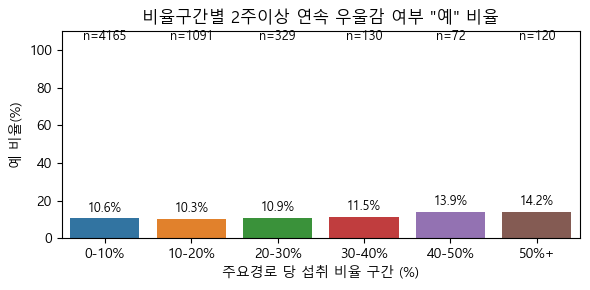

In [85]:
# 비율구간별 2주이상 연속 우울감 여부 "예" 비율 그래프
labels = ['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50%+']
# 구간 순서 고정
df1 = df00f.copy()
df1['비율구간'] = pd.Categorical(df1['비율구간'], categories=labels, ordered=True)
# mental_col 매핑(이미 문자열이면 원값 유지)
mental_col = 'BP5'
df1[mental_col] = df1[mental_col].map({1:'예', 0:'아니오'}).fillna(df1[mental_col])
# 교차표 만들고, 구간 순서대로 재정렬
ct = pd.crosstab(df1['비율구간'], df1[mental_col]).reindex(labels, fill_value=0)
# 분모(예+아니오)와 '예' 비율(%) 계산
den = ct.sum(axis=1).replace(0, np.nan)  # 분모 0이면 NaN
yes = ct['예'] if '예' in ct.columns else 0
pct_yes = (yes / den * 100).fillna(0)
# 시각화: 구간별 '예' 비율(%) 막대
plt.figure(figsize=(6,3))
ax = sns.barplot(x=pct_yes.index, y=pct_yes.values)
ax.set_ylim(0, 110)  # 위에 n 라벨 여유
ax.set_xlabel('주요경로 당 섭취 비율 구간 (%)')
ax.set_ylabel('예 비율(%)')
ax.set_title('비율구간별 2주이상 연속 우울감 여부 "예" 비율')
# 퍼센트 라벨
for i, v in enumerate(pct_yes.values):
    ax.text(i, min(v+2, 100), f'{v:.1f}%', ha='center', va='bottom', fontsize=9)
# 각 막대 위에 표본수(n) 표시
for i, n in enumerate(den.fillna(0).astype(int).values):
    ax.text(i, 104, f'n={n}', ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()

C:\Users\82104\AppData\Local\Temp\ipykernel_8620\1451698155.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df00f.groupby(['비율구간', mental_col]).size().reset_index(name='빈도')
C:\Users\82104\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\82104\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future 

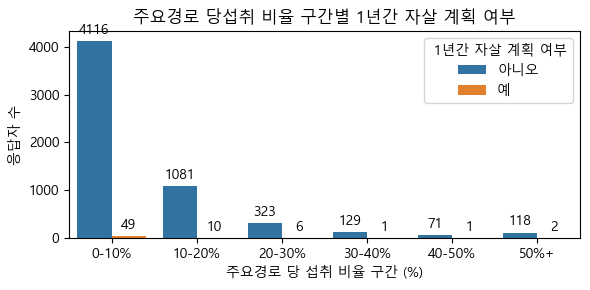

In [87]:
# 주요경로 당섭취 비율 구간별 1년간 자살 계획 여부 그래프
# 주요경로 비율 구간 나누기
df00f['비율구간'] = pd.cut(df00f['주요경로_비율(%)'],
                        bins=[0, 10, 20, 30, 40, 50, 100],
                        labels=['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50%+'],
                        include_lowest=True)
# 정신건강 지표 열 이름 (예: '우울감경험_1=예_2=아니오'와 같은 열로 바꿔줘야 함)
mental_col = 'BP6_2'  # ← 너가 쓰는 정확한 컬럼명으로 수정 필요
# 범주형 응답을 문자열로 바꾸면 더 명확함
df00f[mental_col] = df00f[mental_col].map({1: '예', 0: '아니오'})
# 구간별 응답 분포 집계
grouped = df00f.groupby(['비율구간', mental_col]).size().reset_index(name='빈도')
# 시각화
plt.figure(figsize=(6,3))
barplot = sns.barplot(data=grouped, x='비율구간', y='빈도', hue=mental_col)
plt.title('주요경로 당섭취 비율 구간별 1년간 자살 계획 여부')
plt.xlabel('주요경로 당 섭취 비율 구간 (%)')
plt.ylabel('응답자 수')
plt.legend(title=' 1년간 자살 계획 여부')
plt.tight_layout()
for container in barplot.containers:
    barplot.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)
plt.show()

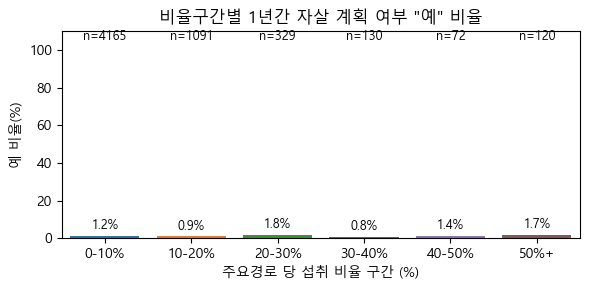

In [89]:
# '비율구간별 1년간 자살 계획 여부 "예" 비율' 그래프
labels = ['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50%+']
# 구간 순서 고정
df1 = df00f.copy()
df1['비율구간'] = pd.Categorical(df1['비율구간'], categories=labels, ordered=True)
# mental_col 매핑(이미 문자열이면 원값 유지)
mental_col = 'BP6_2'
df1[mental_col] = df1[mental_col].map({1:'예', 0:'아니오'}).fillna(df1[mental_col])
# 교차표 만들고, 구간 순서대로 재정렬
ct = pd.crosstab(df1['비율구간'], df1[mental_col]).reindex(labels, fill_value=0)
# 분모(예+아니오)와 '예' 비율(%) 계산
den = ct.sum(axis=1).replace(0, np.nan)  # 분모 0이면 NaN
yes = ct['예'] if '예' in ct.columns else 0
pct_yes = (yes / den * 100).fillna(0)
# 시각화: 구간별 '예' 비율(%) 막대
plt.figure(figsize=(6,3))
ax = sns.barplot(x=pct_yes.index, y=pct_yes.values)
ax.set_ylim(0, 110)  # 위에 n 라벨 여유
ax.set_xlabel('주요경로 당 섭취 비율 구간 (%)')
ax.set_ylabel('예 비율(%)')
ax.set_title('비율구간별 1년간 자살 계획 여부 "예" 비율')
# 퍼센트 라벨
for i, v in enumerate(pct_yes.values):
    ax.text(i, min(v+2, 100), f'{v:.1f}%', ha='center', va='bottom', fontsize=9)
# 각 막대 위에 표본수(n) 표시
for i, n in enumerate(den.fillna(0).astype(int).values):
    ax.text(i, 104, f'n={n}', ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()

C:\Users\82104\AppData\Local\Temp\ipykernel_8620\4287917152.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df00f.groupby(['비율구간', mental_col]).size().reset_index(name='빈도')
C:\Users\82104\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\82104\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future 

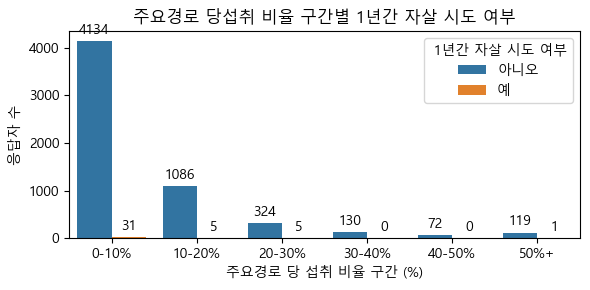

In [91]:
# 주요경로 당섭취 비율 구간별 1년간 자살 시도 여부 그래프
# 주요경로 비율 구간 나누기
df00f['비율구간'] = pd.cut(df00f['주요경로_비율(%)'],
                        bins=[0, 10, 20, 30, 40, 50, 100],
                        labels=['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50%+'],
                        include_lowest=True)
# 정신건강 지표 열 이름 (예: '우울감경험_1=예_2=아니오'와 같은 열로 바꿔줘야 함)
mental_col = 'BP6_31'  # ← 너가 쓰는 정확한 컬럼명으로 수정 필요
# 범주형 응답을 문자열로 바꾸면 더 명확함
df00f[mental_col] = df00f[mental_col].map({1: '예', 0: '아니오'})
# 구간별 응답 분포 집계
grouped = df00f.groupby(['비율구간', mental_col]).size().reset_index(name='빈도')
# 시각화
plt.figure(figsize=(6,3))
barplot = sns.barplot(data=grouped, x='비율구간', y='빈도', hue=mental_col)
plt.title('주요경로 당섭취 비율 구간별 1년간 자살 시도 여부')
plt.xlabel('주요경로 당 섭취 비율 구간 (%)')
plt.ylabel('응답자 수')
plt.legend(title=' 1년간 자살 시도 여부')
plt.tight_layout()
for container in barplot.containers:
    barplot.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)
plt.show()

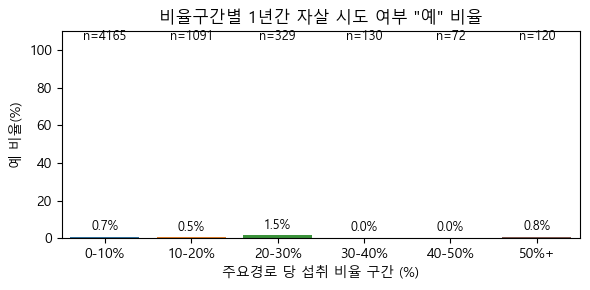

In [93]:
# 비율구간별 1년간 자살 시도 여부 "예" 비율' 그래프
labels = ['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50%+']
# 구간 순서 고정
df1 = df00f.copy()
df1['비율구간'] = pd.Categorical(df1['비율구간'], categories=labels, ordered=True)
# mental_col 매핑(이미 문자열이면 원값 유지)
mental_col = 'BP6_31'
df1[mental_col] = df1[mental_col].map({1:'예', 0:'아니오'}).fillna(df1[mental_col])
# 교차표 만들고, 구간 순서대로 재정렬
ct = pd.crosstab(df1['비율구간'], df1[mental_col]).reindex(labels, fill_value=0)
# 분모(예+아니오)와 '예' 비율(%) 계산
den = ct.sum(axis=1).replace(0, np.nan)  # 분모 0이면 NaN
yes = ct['예'] if '예' in ct.columns else 0
pct_yes = (yes / den * 100).fillna(0)
# 시각화: 구간별 '예' 비율(%) 막대
plt.figure(figsize=(6,3))
ax = sns.barplot(x=pct_yes.index, y=pct_yes.values)
ax.set_ylim(0, 110)  # 위에 n 라벨 여유
ax.set_xlabel('주요경로 당 섭취 비율 구간 (%)')
ax.set_ylabel('예 비율(%)')
ax.set_title('비율구간별 1년간 자살 시도 여부 "예" 비율')
# 퍼센트 라벨
for i, v in enumerate(pct_yes.values):
    ax.text(i, min(v+2, 100), f'{v:.1f}%', ha='center', va='bottom', fontsize=9)
# 각 막대 위에 표본수(n) 표시
for i, n in enumerate(den.fillna(0).astype(int).values):
    ax.text(i, 104, f'n={n}', ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()

C:\Users\82104\AppData\Local\Temp\ipykernel_8620\356795293.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df00f.groupby(['비율구간', mental_col]).size().reset_index(name='빈도')
C:\Users\82104\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\82104\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future d

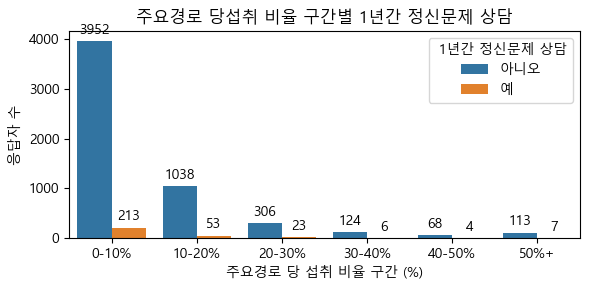

In [95]:
# 주요경로 당섭취 비율 구간별 1년간 정신문제 상담 그래프
# 주요경로 비율 구간 나누기
df00f['비율구간'] = pd.cut(df00f['주요경로_비율(%)'],
                        bins=[0, 10, 20, 30, 40, 50, 100],
                        labels=['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50%+'],
                        include_lowest=True)
# 정신건강 지표 열 이름 (예: '우울감경험_1=예_2=아니오'와 같은 열로 바꿔줘야 함)
mental_col = 'BP7'  # ← 너가 쓰는 정확한 컬럼명으로 수정 필요
# 범주형 응답을 문자열로 바꾸면 더 명확함
df00f[mental_col] = df00f[mental_col].map({1: '예',0: '아니오'})
# 구간별 응답 분포 집계
grouped = df00f.groupby(['비율구간', mental_col]).size().reset_index(name='빈도')
# 시각화
plt.figure(figsize=(6,3))
barplot = sns.barplot(data=grouped, x='비율구간', y='빈도', hue=mental_col)
plt.title('주요경로 당섭취 비율 구간별 1년간 정신문제 상담')
plt.xlabel('주요경로 당 섭취 비율 구간 (%)')
plt.ylabel('응답자 수')
plt.legend(title=' 1년간 정신문제 상담')
plt.tight_layout()
for container in barplot.containers:
    barplot.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)
plt.show()

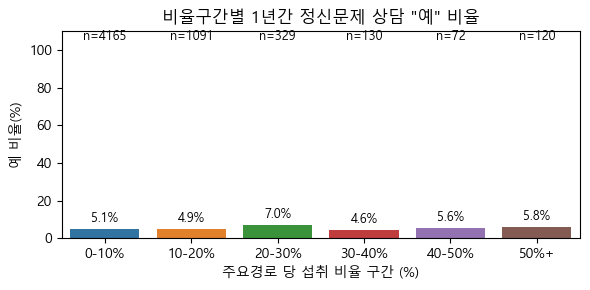

In [97]:
# 비율구간별 1년간 정신문제 상담 "예" 비율 그래프
labels = ['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50%+']
# 구간 순서 고정
df1 = df00f.copy()
df1['비율구간'] = pd.Categorical(df1['비율구간'], categories=labels, ordered=True)
# mental_col 매핑(이미 문자열이면 원값 유지)
mental_col = 'BP7'
df1[mental_col] = df1[mental_col].map({1:'예', 0:'아니오'}).fillna(df1[mental_col])
# 교차표 만들고, 구간 순서대로 재정렬
ct = pd.crosstab(df1['비율구간'], df1[mental_col]).reindex(labels, fill_value=0)
# 분모(예+아니오)와 '예' 비율(%) 계산
den = ct.sum(axis=1).replace(0, np.nan)  # 분모 0이면 NaN
yes = ct['예'] if '예' in ct.columns else 0
pct_yes = (yes / den * 100).fillna(0)
# 시각화: 구간별 '예' 비율(%) 막대
plt.figure(figsize=(6,3))
ax = sns.barplot(x=pct_yes.index, y=pct_yes.values)
ax.set_ylim(0, 110)  # 위에 n 라벨 여유
ax.set_xlabel('주요경로 당 섭취 비율 구간 (%)')
ax.set_ylabel('예 비율(%)')
ax.set_title('비율구간별 1년간 정신문제 상담 "예" 비율')
# 퍼센트 라벨
for i, v in enumerate(pct_yes.values):
    ax.text(i, min(v+2, 100), f'{v:.1f}%', ha='center', va='bottom', fontsize=9)
# 각 막대 위에 표본수(n) 표시
for i, n in enumerate(den.fillna(0).astype(int).values):
    ax.text(i, 104, f'n={n}', ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()

C:\Users\82104\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\82104\AppData\Local\Temp\ipykernel_8620\2392719790.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_means = df00f.groupby('비율구간')['mental_composite'].mean().reindex(labels)


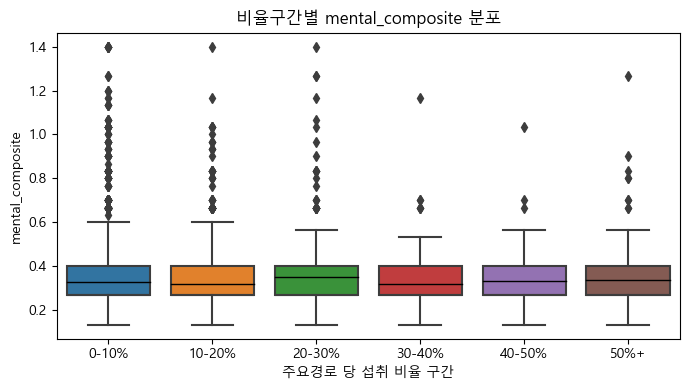

In [99]:
# 정신지표 통합한 변수와 주요경로 당 섭취 비율 구간별 박스플롯
labels = ['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50%+']
plt.figure(figsize=(7, 4))
ax = sns.boxplot(data=df00f, x='비율구간', y='mental_composite', order=labels)
# 평균값 선 추가
group_means = df00f.groupby('비율구간')['mental_composite'].mean().reindex(labels)
for i, mean in enumerate(group_means):
    ax.plot([i - 0.4, i + 0.4], [mean, mean], color='black', linewidth=1)  # 가로선
# 제목 및 라벨 설정
plt.title('비율구간별 mental_composite 분포')
plt.xlabel('주요경로 당 섭취 비율 구간')
plt.ylabel('mental_composite')
plt.tight_layout()
plt.show()